In [30]:
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [31]:
# Import data files
questions = pd.read_csv('../data/ai.stackexchange.com_questions.csv')
answers = pd.read_csv('../data/ai.stackexchange.com_answers.csv')

## Question Analysis

In [32]:
questions.head(2)

,Unnamed: 0,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount
0,0,1,1,3.0,2016-08-02T15:39:14.947,8,384,"what does "" backprop "" mean ? i 've googled it...",8.0,10135.0,2018-10-18T10:45:18.660,2018-10-18T10:45:18.660,"what is "" backprop "" ?",neural-networks backpropagation terminology de...,3,3,1.0
1,1,2,1,9.0,2016-08-02T15:40:20.623,10,404,does increasing the noise in data help to impr...,8.0,2444.0,2019-02-23T22:36:19.090,2019-02-23T22:36:37.133,how does noise affect generalization ?,neural-networks machine-learning statistical-a...,3,0,1.0


In [33]:
questions.describe()

,Unnamed: 0,Id,PostTypeId,AcceptedAnswerId,Score,ViewCount,OwnerUserId,LastEditorUserId,AnswerCount,CommentCount,FavoriteCount
count,3784.000000,3784.000000,3784.0,1398.000000,3784.000000,3784.000000,3758.000000,2253.000000,3784.000000,3784.000000,1387.000000
mean,1891.500000,7118.663319,1.0,6441.515737,2.851744,425.033827,13410.406865,6995.483799,1.358351,1.518235,2.040375
std,1092.491037,3484.721586,0.0,3466.430116,4.557380,1586.971725,7642.479474,7267.456349,1.263999,2.213716,2.918288
min,0.000000,1.000000,1.0,3.000000,-6.000000,2.000000,4.000000,-1.000000,0.000000,0.000000,0.000000
25%,945.750000,4169.250000,1.0,3412.750000,1.000000,44.000000,7380.750000,1671.000000,1.000000,0.000000,1.000000
50%,1891.500000,7229.500000,1.0,6579.000000,2.000000,94.000000,14514.000000,2444.000000,1.000000,1.000000,1.000000
75%,2837.250000,10244.750000,1.0,9286.250000,4.000000,260.250000,19863.000000,10929.000000,2.000000,2.000000,2.000000
max,3783.000000,12642.000000,1.0,12641.000000,147.000000,37656.000000,26090.000000,25984.000000,16.000000,19.000000,55.000000


In [34]:
len(questions)

3784

In [35]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3784 entries, 0 to 3783
Data columns (total 17 columns):
Unnamed: 0          3784 non-null int64
Id                  3784 non-null int64
PostTypeId          3784 non-null int64
AcceptedAnswerId    1398 non-null float64
CreationDate        3784 non-null object
Score               3784 non-null int64
ViewCount           3784 non-null int64
Body                3784 non-null object
OwnerUserId         3758 non-null float64
LastEditorUserId    2253 non-null float64
LastEditDate        2264 non-null object
LastActivityDate    3784 non-null object
Title               3784 non-null object
Tags                3784 non-null object
AnswerCount         3784 non-null int64
CommentCount        3784 non-null int64
FavoriteCount       1387 non-null float64
dtypes: float64(4), int64(7), object(6)
memory usage: 502.6+ KB


## Question with Score > 1

In [36]:
questions['Score'].describe()

count    3784.000000
mean        2.851744
std         4.557380
min        -6.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       147.000000
Name: Score, dtype: float64

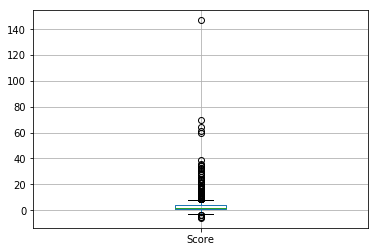

In [37]:
questions.boxplot(column=['Score'])

In [38]:
q_score = questions['Score'] > 2

total = len(questions)
count_q_score = q_score.sum()

print ("# Question with Score gt 0: {}".format(count_q_score))
print ("# Question with Score 0: {}".format(total - count_q_score))

# Question with Score gt 0: 1511
# Question with Score 0: 2273


In [39]:
# Check how many questions per each score
num_questions = []
for i in range(13):
    q_score = questions['Score'] == i
    num = q_score.sum()
    num_questions.append(num)

('Num of questions: ', [517, 968, 686, 490, 343, 217, 130, 78, 49, 68, 36, 18, 16])


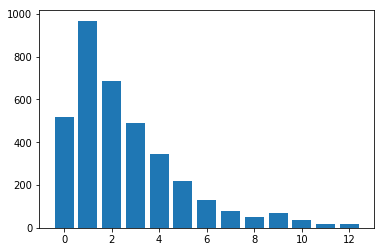

In [40]:
fig, ax = plt.subplots()
ax.bar(range(len(num_questions)), num_questions)
print ("Num of questions: ", num_questions)

## Analysis of Question Length

In [41]:
def get_question_length(row):
    q = row['Body']
    return len(q.split())

questions['QuestionLength'] = questions.apply(get_question_length, axis=1)

In [42]:
questions.QuestionLength.describe()

count    3784.000000
mean      171.955338
std       230.600541
min         5.000000
25%        65.000000
50%       117.000000
75%       205.000000
max      7593.000000
Name: QuestionLength, dtype: float64

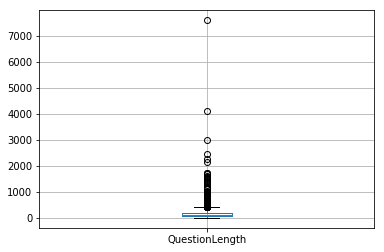

In [43]:
questions.boxplot(column=['QuestionLength'])

Remove the 90 percentile of data point

In [44]:
len_at_25 = questions.QuestionLength.quantile(.25)
len_at_75 = questions.QuestionLength.quantile(.75)
len_at_90 = questions.QuestionLength.quantile(.9)

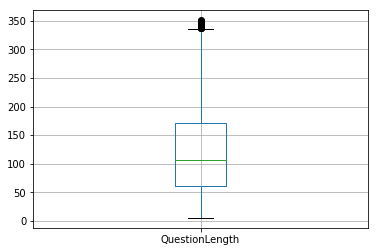

In [45]:
questions[questions['QuestionLength'] < len_at_90].boxplot(column=['QuestionLength'])


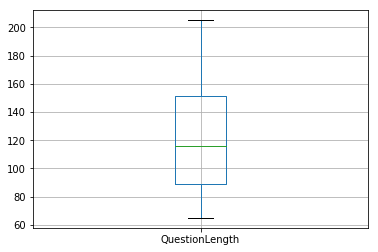

In [46]:
questions[(questions['QuestionLength'] >= len_at_25) & (questions['QuestionLength'] <= len_at_75)].boxplot(column=['QuestionLength'])

## Analysis of Answer Length

In [47]:
answers.head(2)

,Unnamed: 0,Id,PostTypeId,ParentId,CreationDate,Score,Body,OwnerUserId,LastActivityDate,CommentCount
0,0,3,2,1.0,2016-08-02T15:40:24.820,12,""" backprop "" is the same as "" backpropagation ...",4.0,2016-08-02T15:40:24.820,0
1,1,8,2,5.0,2016-08-02T15:45:48.597,2,you can use python - ev3 which can be used to ...,8.0,2016-08-02T15:45:48.597,0


In [48]:
answers.describe()

,Unnamed: 0,Id,PostTypeId,ParentId,Score,OwnerUserId,CommentCount
count,5919.000000,5919.000000,5919.000000,5140.000000,5919.000000,5903.000000,5919.000000
mean,2959.000000,6631.236526,2.330292,6055.369844,1.686096,7930.805692,0.956918
std,1708.812453,3398.275985,0.869412,3447.176529,3.298201,7043.152486,1.886704
min,0.000000,3.000000,2.000000,1.000000,-4.000000,-1.000000,0.000000
25%,1479.500000,3796.500000,2.000000,3114.000000,0.000000,1847.000000,0.000000
50%,2959.000000,6623.000000,2.000000,5840.000000,1.000000,5095.000000,0.000000
75%,4438.500000,9490.000000,2.000000,8908.000000,2.000000,12509.000000,1.000000
max,5918.000000,12643.000000,7.000000,12639.000000,124.000000,26079.000000,21.000000


In [59]:
def get_answer_length(row):
    a = row['Body']
    return len(a.split())

answers.dropna(inplace=True)
answers['AnswerLength'] = answers.apply(get_answer_length, axis=1)

In [61]:
answers.AnswerLength.describe()

count    5126.000000
mean      265.281116
std       281.157038
min         7.000000
25%       100.000000
50%       182.000000
75%       328.000000
max      3529.000000
Name: AnswerLength, dtype: float64

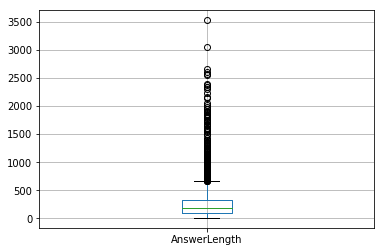

In [62]:
answers.boxplot(column=['AnswerLength'])

In [63]:
len_at_25 = answers.AnswerLength.quantile(.25)
len_at_75 = answers.AnswerLength.quantile(.75)
len_at_90 = answers.AnswerLength.quantile(.9)

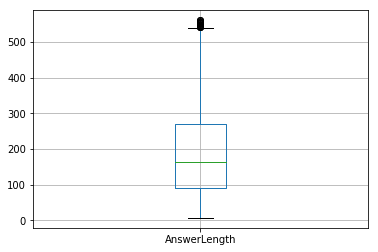

In [65]:
answers[answers['AnswerLength'] < len_at_90].boxplot(column=['AnswerLength'])

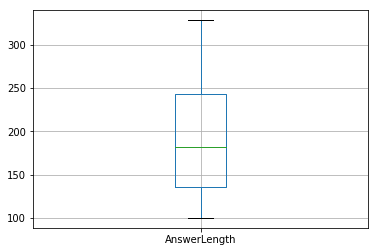

In [66]:
answers[(answers['AnswerLength'] >= len_at_25) & (answers['AnswerLength'] <= len_at_75)].boxplot(column=['AnswerLength'])

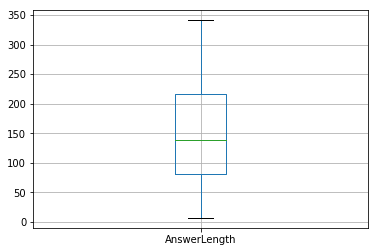

In [68]:
iqr = len_at_75 - len_at_25
max_len = iqr * 1.5
answers[answers['AnswerLength'] < max_len].boxplot(column=['AnswerLength'])

In [70]:
answers[answers['AnswerLength'] < max_len]['AnswerLength'].describe()

count    3926.000000
mean      152.322975
std        85.396434
min         7.000000
25%        82.000000
50%       138.000000
75%       217.000000
max       341.000000
Name: AnswerLength, dtype: float64

## Count WH-Question

In [72]:
titles = questions['Title']

In [77]:
# WH-Question
wh_list = [
    'what', 
    'who', 
    'which', 
    'whom', 
    'where', 
    'when', 
    'whose', 
    'why', 
    'how'
]

# Do, Be, Has
aux_list = [
    'do',
    'does',
    'did',
    'have',
    'has',
    'had',
    'is',
    'are',
    'was',
    'were'
]

In [91]:
def count_question(titles):
    wh_count = 0
    aux_count = 0
    for title in titles:
        is_wh = False
        token = title.split()[0]

        if token in wh_list: 
            wh_count += 1
        elif token in aux_list:
            aux_count += 1
    return wh_count, aux_count

In [97]:
wh_count, aux_count = count_question(titles)
total = len(titles)
normal = total - wh_count - aux_count

print ("WH-Question: {}".format(wh_count))
print ("AUX-Question: {}".format(aux_count))
print ("Total : {}".format(len(titles)))

WH-Question: 1474
AUX-Question: 473
Total : 3784


In [93]:
import seaborn as sns

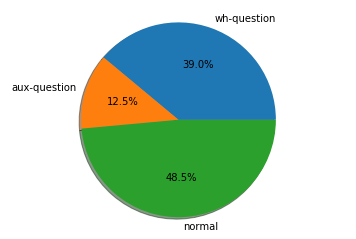

In [100]:
fig1, ax1 = plt.subplots()
ax1.pie([wh_count, aux_count, normal], labels=['wh-question', 'aux-question', 'normal'],autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()